In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

In [2]:
def func(x,a,b,c):
    return a*np.exp(-b*x) +c

In [3]:
df = pd.read_csv("2019nCoV_national.csv")
a = df.shape[0]
df

,Date,Infection,Severe,Death,Recovery,suspected,Observation
0,2020.01.20,291,NaN,6,NaN,54.0,922
1,2020.01.21,440,102.0,9,28.0,NaN,1394
2,2020.01.22,571,95.0,17,28.0,393.0,4928
3,2020.01.23,830,177.0,25,34.0,1072.0,8420
4,2020.01.24,1287,237.0,41,38.0,1965.0,13967
5,2020.01.25,1975,324.0,56,49.0,2684.0,21556
6,2020.01.26,2744,461.0,80,51.0,5794.0,30453
7,2020.01.27,4515,976.0,106,60.0,6973.0,44132
8,2020.01.28,5974,1239.0,132,103.0,9239.0,59990
9,2020.01.29,7711,1370.0,170,124.0,12167.0,81947


In [4]:
x = np.arange(1,a+1,1)
y = np.array(df['Infection'])
x,y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 array([  291,   440,   571,   830,  1287,  1975,  2744,  4515,  5974,
         7711,  9692, 11791, 14380, 17205, 20438, 24324, 28018]))

In [5]:
popt,pcov = curve_fit(func,x,y)
popt,pcov
popt.tolist()

[2401.0589856463907, -0.15230868093685337, -3364.3084686966927]

In [6]:
d = df['Date'].str.split('.',expand = True)
xticklabel=d[1]+'/'+d[2]
xticklabel

0     01/20
1     01/21
2     01/22
3     01/23
4     01/24
5     01/25
6     01/26
7     01/27
8     01/28
9     01/29
10    01/30
11    01/31
12    02/01
13    02/02
14    02/03
15    02/04
16    02/05
dtype: object

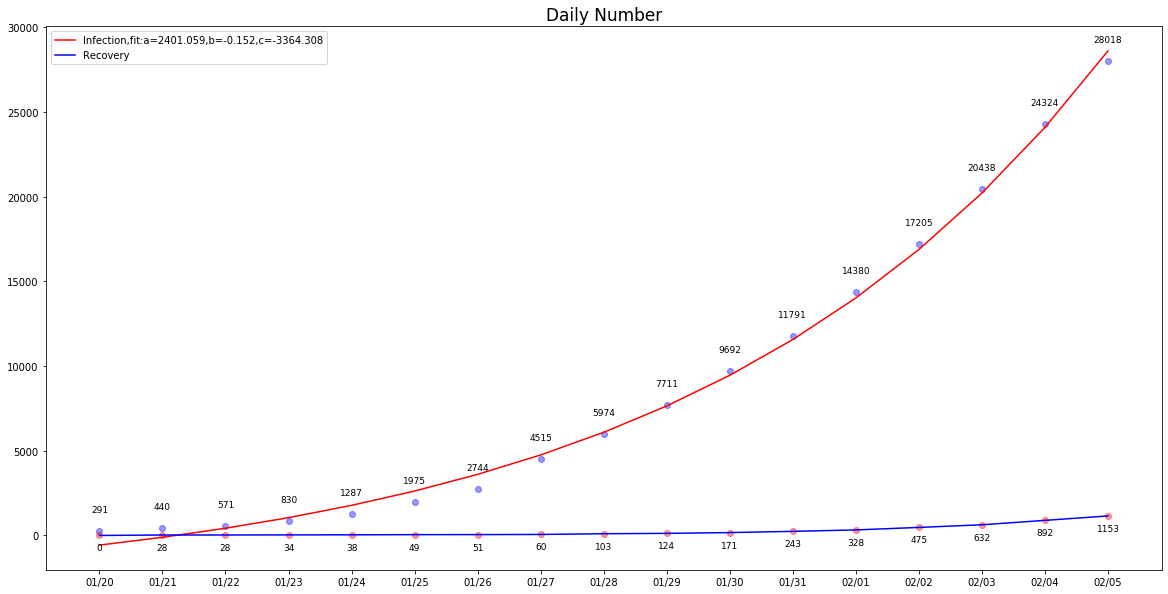

In [14]:
# x.append(16)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily Number',fontdict={"fontsize":17})
# 拟合的确诊人数曲线
ax.plot(x,func(x,*popt),'r-',label = 'Infection,fit:a={0[0]:.3f},b={0[1]:.3f},c={0[2]:.3f}'.format(popt.tolist()))
for a,b in zip(x,y):
    ax.text(a, b+1000, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)
ax.scatter(x,y,c='b',alpha=0.4)
# # 死亡曲线
# ax.plot(x,df['Death'],'g-',label = "Death")
# for a,b in zip(x,df['Death']):
#     ax.text(a, b-1000, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)
# ax.scatter(x,df['Death'],c='r',alpha=0.4)

# 康复曲线
df['Recovery'].fillna(0,inplace = True)
ax.plot(x,df['Recovery'],'b-',label = "Recovery")
for a,b in zip(x,df['Recovery']):
    ax.text(a, b-1000, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)
ax.scatter(x,df['Recovery'],c='r',alpha=0.4)

ax.set_xticks(x)
ax.set_xticklabels(xticklabel)
ax.legend(loc = 'upper left')
plt.savefig('2019nCoV.jpg')
# plt.show()

In [9]:
# 预测
# 17 = 0205
func(1,*popt)

33878.77097866469

In [10]:
# 以下是每日增加人数图的绘制
d = df['Date'].str.split('.',expand = True)
s=(d[1]+'/'+d[2])[1:]
s

1     01/21
2     01/22
3     01/23
4     01/24
5     01/25
6     01/26
7     01/27
8     01/28
9     01/29
10    01/30
11    01/31
12    02/01
13    02/02
14    02/03
15    02/04
16    02/05
dtype: object

In [11]:
ix = np.arange(1,s.shape[0]+1,1)

inc = df.iloc[:,1:].fillna(0).diff()
ix = np.arange(1,s.shape[0]+1,1)
inc = inc.iloc[1:,:]
inc

,Infection,Severe,Death,Recovery,suspected,Observation
1,149.0,102.0,3.0,28.0,-54.0,472.0
2,131.0,-7.0,8.0,0.0,393.0,3534.0
3,259.0,82.0,8.0,6.0,679.0,3492.0
4,457.0,60.0,16.0,4.0,893.0,5547.0
5,688.0,87.0,15.0,11.0,719.0,7589.0
6,769.0,137.0,24.0,2.0,3110.0,8897.0
7,1771.0,515.0,26.0,9.0,1179.0,13679.0
8,1459.0,263.0,26.0,43.0,2266.0,15858.0
9,1737.0,131.0,38.0,21.0,2928.0,21957.0
10,1981.0,157.0,43.0,47.0,3071.0,20480.0


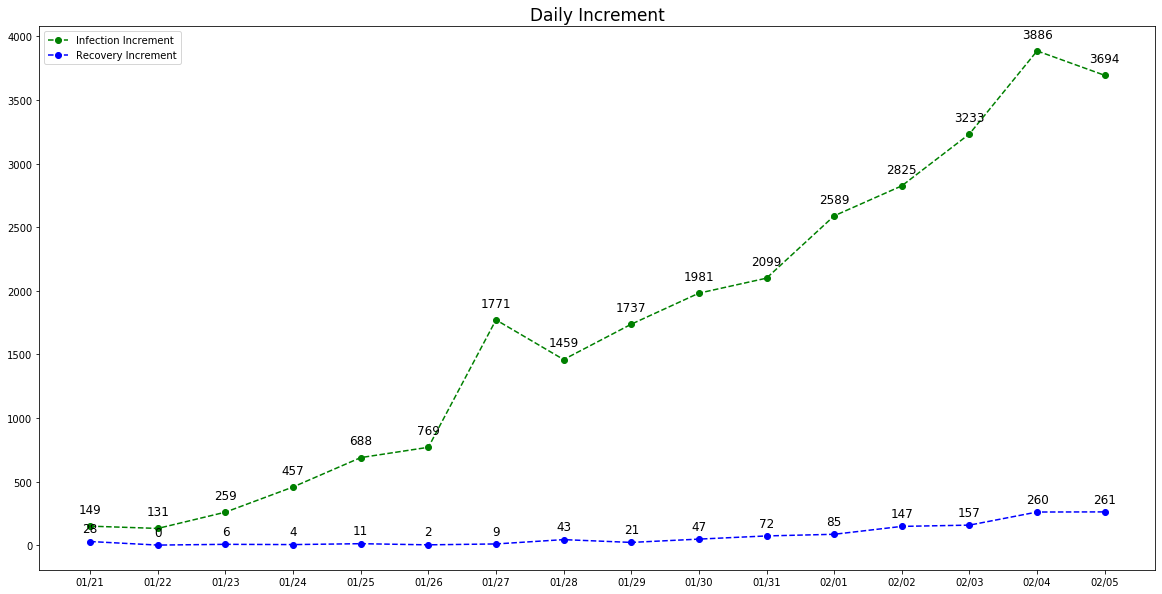

In [12]:
fig_inc = plt.figure(figsize=(20,10))
ax = fig_inc.add_subplot(1,1,1)
ax.set_title('Daily Increment',fontdict={"fontsize":17})
ax.plot(ix,inc['Infection'],'go--',label = "Infection Increment")
for a,b in zip(ix,inc["Infection"]):
    ax.text(a, b+80, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)

ax.plot(ix,inc['Recovery'],'bo--',label = "Recovery Increment")
for a,b in zip(ix,inc["Recovery"]):
    ax.text(a,b+50,"%.0f" % b , ha ="center", va = "bottom" ,fontsize=12)

ax.set_xticks(ix)
ax.set_xticklabels(s)
ax.legend(loc = "upper left")
plt.savefig("2019nCoV_inc.png")